# Analysis of a pseudoscalar correlator (computed using openQCD)

In [1]:
import ADerrors as AD
import HDF5
import Plots
import Statistics as Stats
using LaTeXStrings
import CorrelatorAnalysis as CA

Import correlator

In [2]:
file_path = "../test/data/correlator_openqxd.hdf5"
corr = HDF5.h5read(file_path, "Correlator");

Nₜ, N_cnfg = size(corr)

(64, 13)

## Non-folded correlator

Initialize correlator and set lattice constant

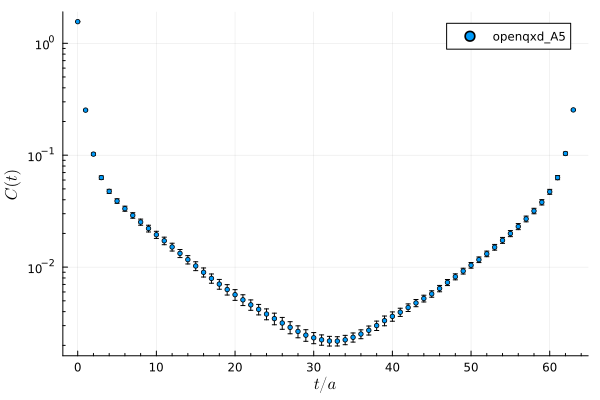

In [3]:
mcid = "openqxd_A5"
a = AD.uwreal([0.0755, sqrt(0.0009^2 + 0.0007^2)], "a")/CA.ħc  # 1/MeV
unit = "MeV"

# Autocorrelation is almost zero -> neglect it by choosing window=1
Cₜ = CA.uwreal_array(corr, mcid, 1)

p = CA.plot_correlator(Cₜ)
display(p)

Effective mass

For t = 32 (iₜ=33): Roots.ConvergenceFailed("Algorithm failed to converge")


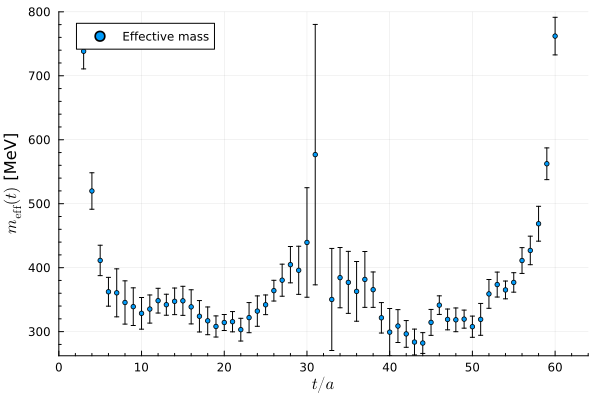

In [4]:
am_eff = CA.effective_mass(Cₜ, :cosh)

p = Plots.plot(xlim=[0, 64], ylim=[:auto, 800])
CA.plot_effective_mass!(am_eff/a, unit=unit)
display(p)

Constant fit to effective mass plateau

In [5]:
# Plateau range (lattice units)
plateau_range = [13, 49]

am = CA.fit_plateau(am_eff, plateau_range)
CA.err!(am)
m = CA.err!(am/a)

327.0798452545256 +/- 7.755521136320138

Plot effective mass of correlator with fit to plateau

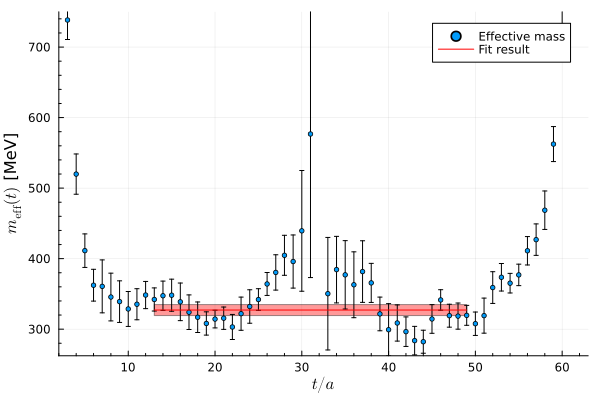

In [6]:
p = Plots.plot(xlim=[2, 63], ylim=[:auto, 750])
CA.plot_effective_mass!(p, am_eff/a, unit=unit)
CA.plot_error_rectangle!(m, plateau_range)
display(p)

Fit to correlator

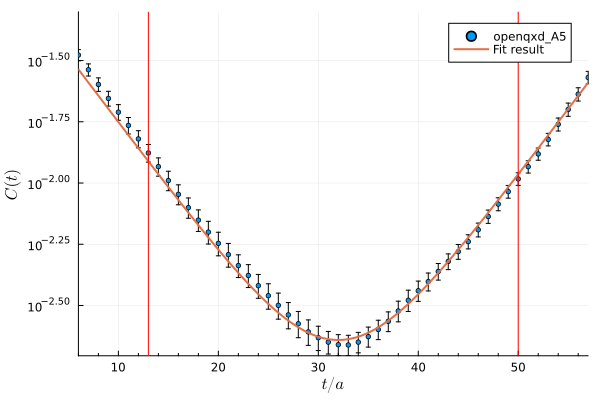

325.299702527668 +/- 9.70021045013493

In [11]:
corr_model(t, p) = @. p[1]*cosh(p[2]*(t - Nₜ/2))
fit_range = [plateau_range[1], plateau_range[2]+1]
xdata = range(fit_range...)
ydata = Cₜ[xdata.+1]

p0 = [2e-3, 0.15]
#= p = Plots.plot(title="Initial guess")
CA.plot_correlator!(Cₜ)
CA.plot_model!(corr_model, [0, Nₜ-1], p0)
display(p) =#

(A, am_fit), cexp = CA.fit(corr_model, xdata, ydata, p0)


p = Plots.plot(xlims=[6, 57], ylims=[:auto, 5e-2])
CA.plot_correlator!(Cₜ)
CA.plot_model!(corr_model, [0, Nₜ-1], AD.value.([A, am_fit]))
Plots.vline!(fit_range, label=nothing, color=:red)
display(p)

CA.err!(am_fit/a)

## Folded correlator

Folded correlator

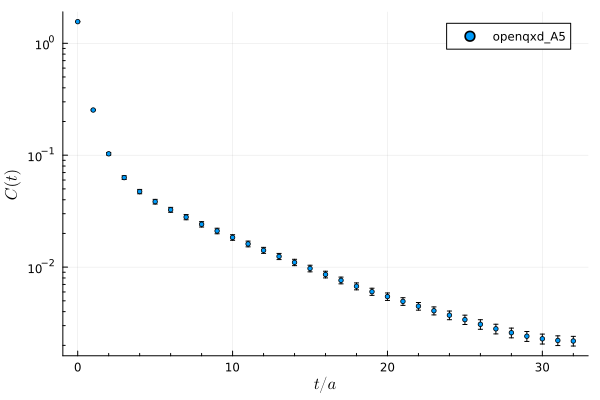

In [12]:
Cₜ_folded = CA.fold_correlator(Cₜ)

p = CA.plot_correlator(Cₜ_folded)
display(p)

Effective mass of folded correlator

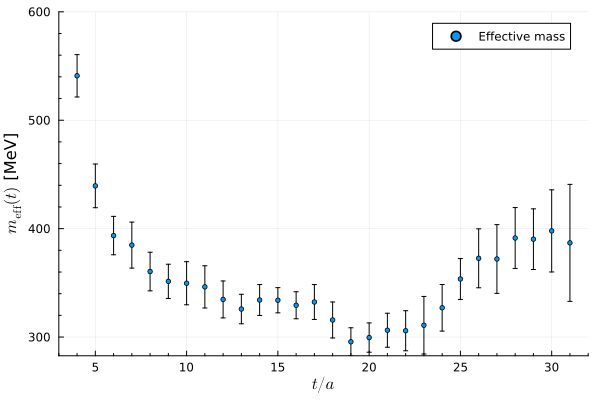

In [13]:
am_eff_folded = CA.effective_mass(Cₜ_folded, :cosh, folded=true)

p = Plots.plot(xlim=[3, :auto], ylim=[:auto, 600])
CA.plot_effective_mass!(p, am_eff_folded/a, unit=unit)
display(p)

Constant fit to effective mass plateau

In [14]:
# Plateau range (lattice units)
plateau_range_folded = [12, 31]

am_folded = CA.fit_plateau(am_eff_folded, plateau_range_folded)
m_folded = CA.err!(am_folded/a)

326.8968263673802 +/- 8.199945577057564

Plot effective mass of folded correlator with fit to plateau

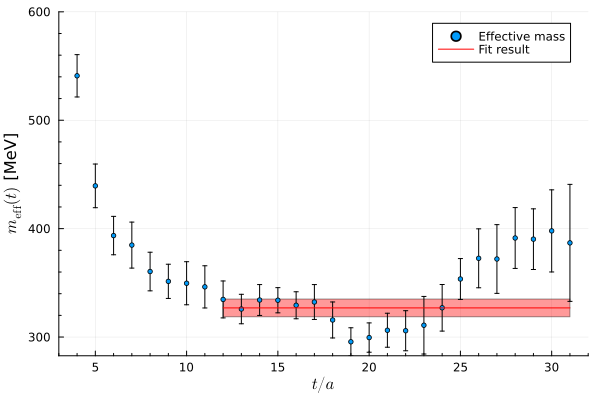

In [15]:
p = Plots.plot(xlim=[3, :auto], ylim=[:auto, 600])
CA.plot_effective_mass!(p, am_eff_folded/a, unit=unit)
CA.plot_error_rectangle!(m_folded, plateau_range_folded)
display(p)

Fit to correlator

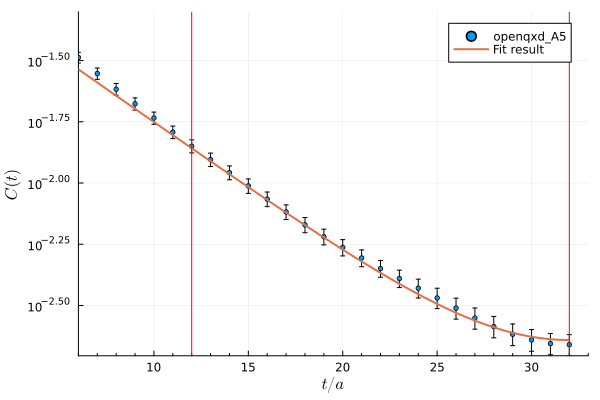

327.1734476838068 +/- 9.119123879443574

In [16]:
fit_range_folded = [plateau_range_folded[1], plateau_range_folded[2]+1]
xdata = range(fit_range_folded...)
ydata = Cₜ_folded[xdata.+1]

p0 = [5e-3, 0.11]
#= p = Plots.plot()
CA.plot_correlator!(Cₜ_folded)
CA.plot_model!(corr_model, [0, Nₜ÷2], p0)
display(p) =#

(A_folded, am_folded_fit), cexp = CA.fit(corr_model, xdata, ydata, p0)

p = Plots.plot(xlims=[6, 33], ylims=[:auto, 5e-2])
CA.plot_correlator!(Cₜ_folded)
CA.plot_model!(corr_model, [0, Nₜ÷2], AD.value.([A, am_fit]))
Plots.vline!(fit_range_folded, label=nothing, color=:red)
display(p)

CA.err!(am_folded_fit/a)